In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.models import Model, Sequential
from keras.layers import Activation, Dense, BatchNormalization, Dropout, Conv2D, concatenate, Conv2DTranspose, MaxPooling2D, UpSampling2D, Input, Reshape
from keras import backend as K
#from keras.layers.core import SpatialDropout2D
from tensorflow.keras.layers import SpatialDropout2D
from keras.optimizers import Adam, SGD
import tensorflow as tf
import numpy as np
import pandas as pd
import glob
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

from sklearn.model_selection import train_test_split
from warnings import filterwarnings

filterwarnings('ignore')
plt.rcParams["axes.grid"] = False
#seed = 42  # Define seed as a variable and set it as the random seed
#np.random.seed(seed)  # Set the random seed
import tensorflow as tf
import os
import numpy as np
from sklearn.model_selection import train_test_split

from tqdm import tqdm
from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt

seed = 42
np.random.seed = seed

IMG_WIDTH = 256
IMG_HEIGHT = 256
IMG_CHANNELS = 3

# Update the path to your dataset root directory
ROOT_PATH = '/content/drive/MyDrive/'

# List of subfolder names containing images
image_subfolders = ['images'
                    ]

# List of corresponding subfolders containing masks
mask_subfolders = [
                   'Bmasks'

                   ]


X_data = []
Y_data = []

for image_subfolder, mask_subfolder in zip(image_subfolders, mask_subfolders):
    IMAGE_PATH = os.path.join(ROOT_PATH, image_subfolder)
    MASK_PATH = os.path.join(ROOT_PATH, mask_subfolder)

    # Get a list of image file names from the current image subfolder
    image_files = [file for file in os.listdir(IMAGE_PATH) if file.endswith('.jpg')]  # Update the file extension if needed

    for n, image_file in tqdm(enumerate(image_files), total=len(image_files)):
        img = imread(os.path.join(IMAGE_PATH, image_file))[:, :, :IMG_CHANNELS]
        img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
        X_data.append(img)

        mask_file = f'mask_{image_file}'
        mask = imread(os.path.join(MASK_PATH, mask_file))
        mask = np.expand_dims(resize(mask, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True), axis=-1)
        Y_data.append(mask)

X_data = np.array(X_data, dtype=np.uint8)
Y_data = np.array(Y_data, dtype=np.bool)

print('X_data shape:', X_data.shape)
print('Y_data shape:', Y_data.shape)

 63%|██████▎   | 3232/5108 [15:02<07:16,  4.30it/s]

In [ ]:
# Display the shapes and number of items in the first batch

print('Number of items in X_batch:', len(X_data))
print('Number of items in Y_batch:', len(Y_batch))

NameError: ignored

In [ ]:
import tensorflow as tf
import os
import numpy as np
from sklearn.model_selection import train_test_split

from tqdm import tqdm
from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt

seed = 42
np.random.seed = seed

IMG_WIDTH = 256
IMG_HEIGHT = 256
IMG_CHANNELS = 3

# Update the paths to your dataset
IMAGE_PATH = '/content/drive/MyDrive/images/'
MASK_PATH = '/content/drive/MyDrive/Bmasks/'

# Get a list of image file names from your dataset folder
image_files = [file for file in os.listdir(IMAGE_PATH) if file.endswith('.jpg')]  # Update the file extension if needed
mask_files = ['mask_' + file for file in image_files]

X_data = np.zeros((len(image_files), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_data = np.zeros((len(mask_files), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)

print('Resizing images and masks')
for n, image_file in tqdm(enumerate(image_files), total=len(image_files)):
    img = imread(os.path.join(IMAGE_PATH, image_file))[:, :, :IMG_CHANNELS]
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_data[n] = img

    mask_file = mask_files[n]
    mask = imread(os.path.join(MASK_PATH, mask_file))
    mask = np.expand_dims(resize(mask, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True), axis=-1)
    Y_data[n] = mask



In [ ]:
# Split the data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X_data, Y_data, test_size=0.1, random_state=seed)


In [ ]:
import random
image_x = random.randint(0, len(image_files))
imshow(X_train[image_x])
plt.show()
imshow(np.squeeze(Y_train[image_x]))
plt.show()


In [ ]:
#build_model

In [ ]:
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

#Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)

c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Expansive path
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

modelu = tf.keras.Model(inputs=[inputs], outputs=[outputs])
modelu.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#model.summary()

In [ ]:
# Model checkpoint callback
checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_green_area.h5', verbose=1, save_best_only=True)


In [ ]:
callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
        tf.keras.callbacks.TensorBoard(log_dir='logs')]


In [ ]:
results = modelu.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=25, callbacks=callbacks)

Epoch 1/25
259/259 [==============================] - 77s 217ms/step - loss: 0.2502 - accuracy: 0.8685 - val_loss: 0.1672 - val_accuracy: 0.9245
Epoch 2/25
259/259 [==============================] - 48s 185ms/step - loss: 0.1495 - accuracy: 0.9309 - val_loss: 0.1417 - val_accuracy: 0.9338
Epoch 3/25
259/259 [==============================] - 49s 190ms/step - loss: 0.1372 - accuracy: 0.9345 - val_loss: 0.1287 - val_accuracy: 0.9378
Epoch 4/25
259/259 [==============================] - 49s 188ms/step - loss: 0.1325 - accuracy: 0.9359 - val_loss: 0.1327 - val_accuracy: 0.9367
Epoch 5/25
259/259 [==============================] - 49s 190ms/step - loss: 0.1285 - accuracy: 0.9372 - val_loss: 0.1269 - val_accuracy: 0.9388
Epoch 6/25
259/259 [==============================] - 49s 190ms/step - loss: 0.1265 - accuracy: 0.9378 - val_loss: 0.1202 - val_accuracy: 0.9405
Epoch 7/25
259/259 [==============================] - 49s 189ms/step - loss: 0.1246 - accuracy: 0.9384 - val_loss: 0.1181 - val_ac

In [ ]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, f1_score

# Assuming you have loaded and preprocessed your data and trained your model
# ...

# Predict on the validation data
prediction = modelu.predict(X_val)

# Threshold the predicted probabilities to get binary masks
prediction_binary = (prediction > 0.5).astype(np.uint8)
Y_val_binary = (Y_val > 0.5).astype(np.uint8)

# Calculate accuracy
accuracy = accuracy_score(Y_val_binary.flatten(), prediction_binary.flatten())

# Print the accuracy
print(f"Test Accuracy: {accuracy*100}%")

f1score = f1_score(Y_val_binary.flatten(), prediction_binary.flatten())

# Print the F1-score
print(f"F1-Score: {f1score}")

from sklearn.metrics import precision_score

# Calculate precision
precision = precision_score(Y_val_binary.flatten(), prediction_binary.flatten())

print(f"Precision: {precision}")


16/16 [==============================] - 10s 385ms/step
Test Accuracy: 94.13212367466518%
F1-Score: 0.90788613092331
Precision: 0.9566513077442615


16/16 [==============================] - 1s 67ms/step


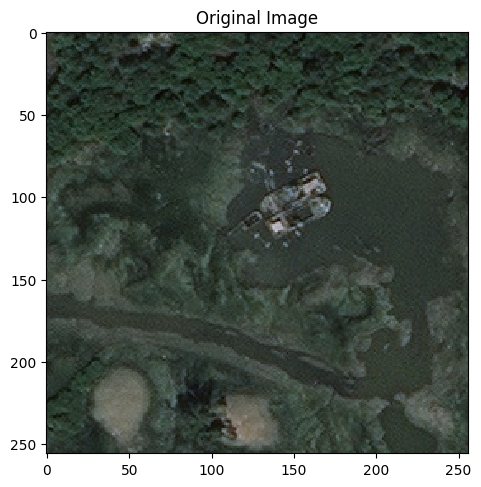

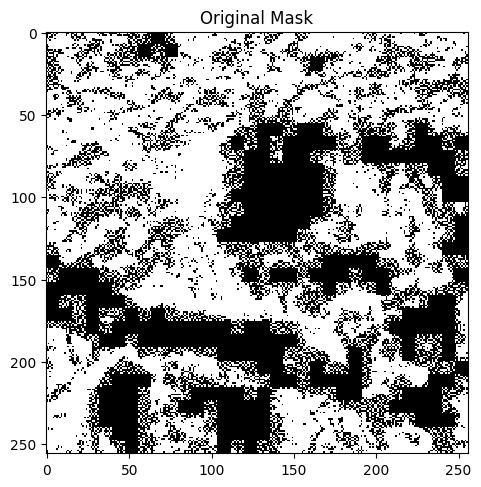

/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


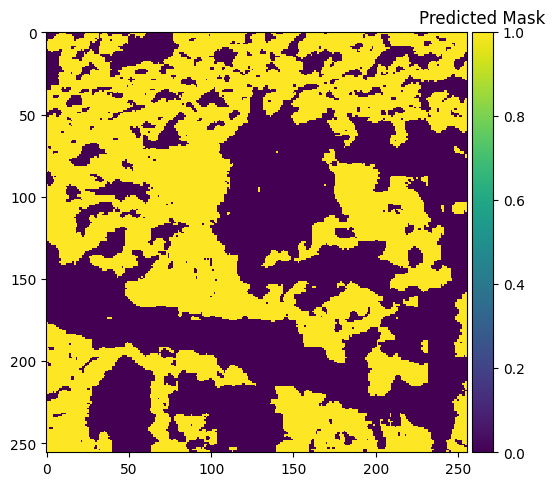

In [ ]:
# Predict on the validation set
preds_val = modelu.predict(X_val, verbose=1)

# Threshold predictions (convert to binary)
preds_val_t = (preds_val > 0.5).astype(np.uint8)

# Perform a sanity check on some random validation samples
ix = np.random.randint(0, len(X_val))
imshow(X_val[ix])
plt.title("Original Image")
plt.show()
imshow(np.squeeze(Y_val[ix]))
plt.title("Original Mask")
plt.show()
imshow(np.squeeze(preds_val_t[ix]))
plt.title("Predicted Mask")
plt.show()



In [ ]:
new_model_name = 'rev_unet_kaggle.h5'
modelu.save('/content/drive/My Drive/' + new_model_name)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
